In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures"

In [31]:
maven = pd.read_csv(f"{csv_folder}/models_performance/maven.csv", index_col=0).add_suffix('_maven')
gradle = pd.read_csv(f"{csv_folder}/models_performance/gradle.csv", index_col=0).add_suffix('_gradle')
complete = pd.read_csv(f"{csv_folder}/models_performance/complete.csv", index_col=0).add_suffix('_complete')

In [34]:
frames = [maven,gradle,complete]
for frame in frames:
    print(frame.shape)

(120, 4)
(120, 4)
(120, 4)


In [44]:
results = pd.concat(frames,axis=1)

In [45]:
results

,reg_dataset1_maven,reg_dataset2_maven,bin_dataset1_maven,bin_dataset2_maven,reg_dataset1_gradle,reg_dataset2_gradle,bin_dataset1_gradle,bin_dataset2_gradle,reg_dataset1_complete,reg_dataset2_complete,bin_dataset1_complete,bin_dataset2_complete
0,0.442661,0.416227,1.000,0.875,0.232701,0.619694,0.571429,0.571429,0.263095,0.312500,0.636364,0.727273
1,0.717444,0.600857,0.875,0.875,0.321399,-0.551560,0.857143,0.857143,0.522969,0.437438,0.545455,0.727273
2,0.341068,0.509217,0.875,0.875,0.700280,-0.263288,0.333333,0.333333,-0.550497,0.040641,0.700000,0.700000
3,0.268293,-1.165235,0.875,1.000,0.642865,-0.306490,0.571429,0.571429,-0.691057,-1.376215,0.700000,0.900000
4,0.218851,0.327263,1.000,1.000,0.565084,0.399689,0.571429,0.571429,0.459532,-0.304283,0.500000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.258616,0.255902,0.875,0.875,-2.229976,0.069169,0.714286,0.714286,-0.682219,-0.469250,0.727273,0.636364
116,0.349836,0.402399,1.000,1.000,0.720242,0.760839,0.833333,0.833333,0.210363,0.142646,0.272727,0.818182
117,0.286245,0.576405,0.875,0.875,0.128988,0.641441,0.714286,0.714286,0.271664,0.248478,0.700000,0.700000
118,0.005914,0.457443,0.875,0.875,-0.830643,0.714821,0.571429,0.571429,0.217772,0.432710,0.700000,0.700000


In [52]:
results[[col for col in results.columns if col.startswith("reg_dataset1")]].median()

reg_dataset1_maven       0.385777
reg_dataset1_gradle      0.503142
reg_dataset1_complete    0.191622
dtype: float64

In [51]:
results[[col for col in results.columns if col.startswith("reg_dataset2")]].median()

reg_dataset2_maven       0.303527
reg_dataset2_gradle      0.512905
reg_dataset2_complete    0.103439
dtype: float64

In [53]:
results[[col for col in results.columns if col.startswith("bin_dataset1")]].median()

bin_dataset1_maven       0.875000
bin_dataset1_gradle      0.714286
bin_dataset1_complete    0.636364
dtype: float64

In [54]:
results[[col for col in results.columns if col.startswith("bin_dataset2")]].median()

bin_dataset2_maven       0.875000
bin_dataset2_gradle      0.714286
bin_dataset2_complete    0.700000
dtype: float64

In [55]:
from scipy import stats

In [64]:
for col in results.columns:
    val, p = stats.normaltest(results[col])
    if(p>0.05):
        print(col, stats.normaltest(results[col]))

bin_dataset1_complete NormaltestResult(statistic=2.740548006595402, pvalue=0.2540373429459395)
bin_dataset2_complete NormaltestResult(statistic=0.47987865839756244, pvalue=0.786675587856942)


<AxesSubplot:ylabel='Density'>

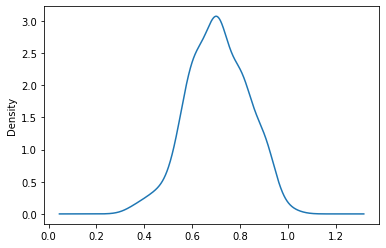

In [65]:
results.bin_dataset2_complete.plot(kind="kde")

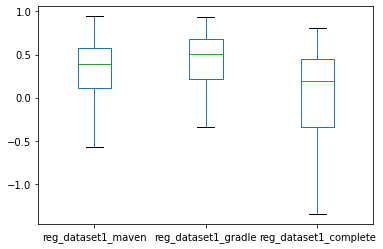

In [72]:
ax = results[[col for col in results.columns if col.startswith("reg_dataset1")]].plot(kind="box", showfliers=False)

In [103]:

results.describe()

,reg_dataset1_maven,reg_dataset2_maven,bin_dataset1_maven,bin_dataset2_maven,reg_dataset1_gradle,reg_dataset2_gradle,bin_dataset1_gradle,bin_dataset2_gradle,reg_dataset1_complete,reg_dataset2_complete,bin_dataset1_complete,bin_dataset2_complete
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.082673,-0.039568,0.896875,0.904167,0.157119,0.135442,0.700397,0.700397,-0.003579,-0.246240,0.633106,0.706894
std,1.007062,1.096916,0.096774,0.088364,1.143920,1.676151,0.175224,0.175224,0.596684,0.967050,0.123111,0.122768
min,-5.585999,-5.660871,0.625000,0.625000,-7.530096,-14.317308,0.142857,0.142857,-1.906955,-3.958115,0.272727,0.363636
25%,0.117431,-0.086492,0.875000,0.875000,0.220168,0.237968,0.642857,0.642857,-0.336842,-0.309249,0.545455,0.600000
50%,0.385777,0.303527,0.875000,0.875000,0.503142,0.512905,0.714286,0.714286,0.191622,0.103439,0.636364,0.700000
75%,0.580344,0.517717,1.000000,1.000000,0.678688,0.660292,0.833333,0.833333,0.447755,0.286181,0.700000,0.800000
max,0.943708,0.954004,1.000000,1.000000,0.940118,0.874435,1.000000,1.000000,0.810464,0.659556,0.900000,1.000000


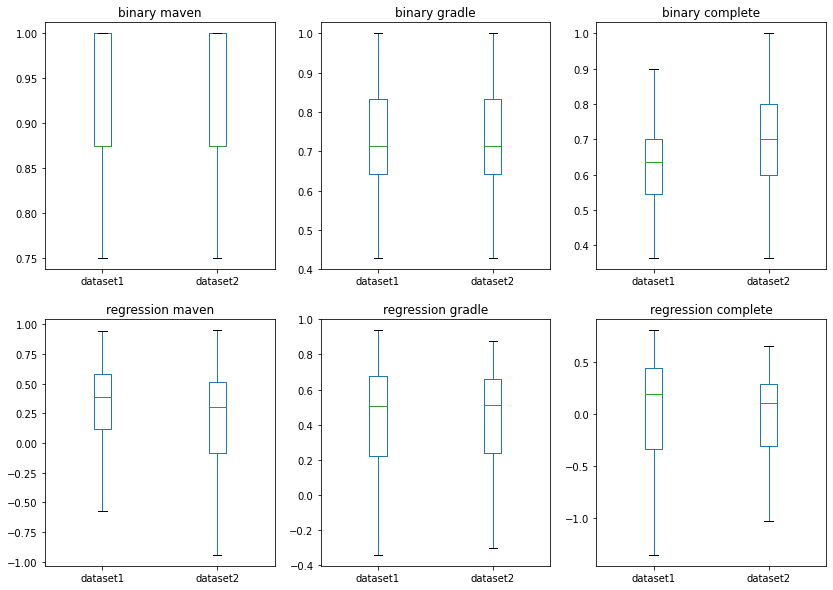

In [102]:
fig, axes = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
axes = axes.flatten()
pairs = {"binary maven": ["bin_dataset1_maven","bin_dataset2_maven"],
         "binary gradle":["bin_dataset1_gradle","bin_dataset2_gradle"],
         "binary complete":["bin_dataset1_complete","bin_dataset2_complete"],
         "regression maven":["reg_dataset1_maven","reg_dataset2_maven"],
         "regression gradle":["reg_dataset1_gradle","reg_dataset2_gradle"],
         "regression complete":["reg_dataset1_complete","reg_dataset2_complete"]}
for i, pair in enumerate(pairs):
    df = results[pairs[pair]]
    df.columns = ["dataset1", "dataset2"]
    ax = df.plot(kind="box", showfliers=False, ax=axes[i])
    ax.set_title(pair)
plt.savefig(f"{figure_folder}/machine_learning_results/performance_comparison/dataset1_vs_2.png", transparent=True, bbox_inches='tight', pad_inches=0.2)